In [161]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from os import walk
from os.path import join

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [4]:
spam_mails_path_1 = 'Downloads/SpamData/01_Processing/spam_assassin_corpus/spam_1'
spam_mails_path_2 = 'Downloads/SpamData/01_Processing/spam_assassin_corpus/spam_2'

ham_mails_path_1 = 'Downloads/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
ham_mails_path_2 = 'Downloads/SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

spam_cat = 1
ham_cat = 0

DATA_TO_JSON = 'Downloads/SpamData/01_Processing/email-text-data.json'

In [5]:
def generator_mails(path):
    for root, dirname, filename in walk(path):
        for file_name in filename:
            
            filepath = join(root, file_name)
            
            stream =  open(filepath, encoding='latin-1')
            
            is_body = False
            lines = []
            
            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True
                    
                    
            stream.close()
            
            email_body = '\n'.join(lines) 
            
            yield file_name, email_body

In [6]:
def email_to_df(path, classification):
    
    rows = []
    rows_names = []
    
    for file_name, email_body in generator_mails(path):
        rows.append({'MESSAGE': email_body, 'CATAGORY' : classification})
        rows_names.append(file_name)
        
    return pd.DataFrame(rows, index=rows_names)

In [7]:
spam_mails = email_to_df(spam_mails_path_1, spam_cat)
spam_mails = spam_mails.append(email_to_df(spam_mails_path_2, spam_cat))
spam_mails.head()


,MESSAGE,CATAGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [8]:
ham_mails = email_to_df(ham_mails_path_1, ham_cat)
ham_mails = ham_mails.append(email_to_df(ham_mails_path_2, ham_cat))
ham_mails.head()

,MESSAGE,CATAGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [9]:
print(spam_mails.shape)

print(ham_mails.shape)

(1898, 2)
(3901, 2)


In [10]:
data = pd.concat([spam_mails, ham_mails])

print('ENTIRE SHAPE OF DATAFRAME IS :', data.shape)

data.head()

ENTIRE SHAPE OF DATAFRAME IS : (5799, 2)


,MESSAGE,CATAGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [11]:
data['MESSAGE'].isnull().any()

False

In [12]:
(data.MESSAGE.str.len() == 0).any()

True

In [13]:
(data.MESSAGE.str.len() == 0).sum()

3

In [14]:
data.MESSAGE.isnull().values.sum()

0

In [15]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [16]:
data.drop(['cmds'], inplace=True)

In [17]:
 data.shape

(5796, 2)

In [18]:
documents_ids = range(0, len(data.index))
data['DOC_ID'] = documents_ids

data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int32

In [19]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace=True)



In [20]:
data.head()

,MESSAGE,CATAGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [21]:
data.tail()

,MESSAGE,CATAGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


In [22]:
data.to_json(DATA_TO_JSON)

In [23]:
amount_of_spam = data.CATAGORY.value_counts()[1]
amount_of_ham = data.CATAGORY.value_counts()[0]

In [24]:
catagory_names  = ['SPAM_MAILS', 'HAM_MAILS']
sizes = [amount_of_spam, amount_of_ham]

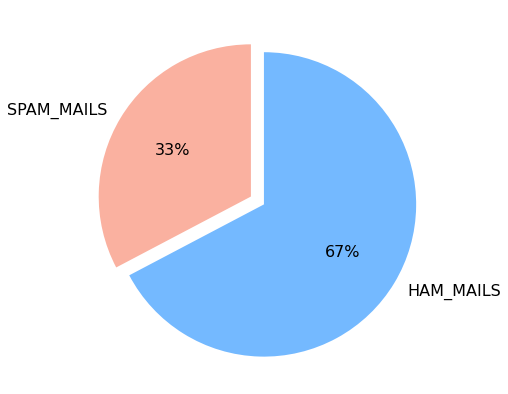

In [25]:
custom_colors = ['#fab1a0', '#74b9ff']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=catagory_names, textprops={'fontsize' : 16}, startangle=90,
       autopct='%1.0f%%', colors=custom_colors, explode=[0, 0.1])
plt.show()

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rahul's
[nltk_data]     OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rahul's
[nltk_data]     OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
soup = BeautifulSoup(data.at[3332, 'MESSAGE'], 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of On Thursday 05 September 2002 04:10 CET Mike Burger wrote:

&gt; Just loaded up SA 2.40 from Theo's RPMs...spamassassin-2.40-1 and

&gt; perl-Mail-SpamAssassin-2.40-1 on a RH 7.1 system with perl 5.6.1 running

&gt; on it.

&gt;

&gt; I'm getting messages that seem to indicate that SA can't find

&gt; PerMsgStatus, like so:

&gt;

&gt; Sep  4 21:01:59 burgers spamd[17579]: Failed to run CTYPE_JUST_HTML

&gt; SpamAssassin test, skipping: ^I(Can't locate object method

&gt; "check_for_content_type_just_html" via package

&gt; "Mail::SpamAssassin::PerMsgStatus" (perhaps you forgot to load

&gt; "Mail::SpamAssassin::PerMsgStatus"?) at

&gt; /usr/lib/perl5/site_perl/5.6.1/Mail/SpamAssassin/PerMsgStatus.pm line

&gt; 1814, <stdin> line 21. )

&gt;

&gt;[...]

&gt;

&gt; Any ideas?



Perl doesn't complain that it can't find PerMsgStatus.pm but the function 

check_for_content_type_just_html(). Do you probably have some old rules 

files still lurking around? Thi

In [29]:
def clean_message_no_html_tags(message):
    
    stemmer=PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words
            
    

In [30]:
clean_message_no_html_tags(data.at[2, 'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

In [31]:
%%time


all_emails = data.MESSAGE.iloc[0:5796]

nested_list = all_emails.apply(clean_message_no_html_tags)

print(nested_list.head())

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object
Wall time: 37.3 s


In [32]:
spam_list_subset = data[data.CATAGORY == 1].index

ham_list_subset = data[data.CATAGORY == 0].index

In [33]:
nested_spam_subset = nested_list.loc[spam_list_subset]

nested_spam_subset.tail()

DOC_ID
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, dtype: object

In [34]:
nested_ham_subset = nested_list.loc[ham_list_subset]

nested_ham_subset.head()

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [martin, post, tasso, papadopoulo, greek, scul...
1898    [man, threaten, explos, moscow, thursday, augu...
1899    [klez, viru, wo, die, alreadi, prolif, viru, e...
1900    [ad, cream, spaghetti, carbonara, effect, past...
Name: MESSAGE, dtype: object

In [35]:
%time

flat_list_for_spam = [item for sublist in nested_spam_subset for item in sublist]

spammy_words = pd.Series(flat_list_for_spam).value_counts()

spammy_words[:15]


Wall time: 0 ns


http       3097
email      3090
free       2585
click      2058
receiv     1989
list       1971
get        1914
pleas      1852
busi       1792
order      1746
mail       1728
remov      1667
address    1661
money      1541
one        1534
dtype: int64

In [36]:
%%time

flat_list_for_ham = [item for sublist in nested_ham_subset for item in sublist]

hammy_words = pd.Series(flat_list_for_ham).value_counts()

hammy_words[:15]


Wall time: 145 ms


http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
time      1741
wrote     1679
file      1583
new       1500
peopl     1474
dtype: int64

In [37]:
!pip install wordcloud

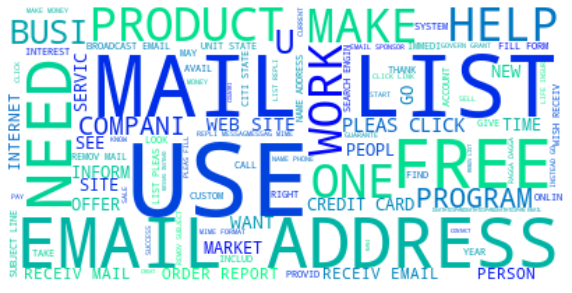

In [86]:
ham_str = ' '.join(flat_list_for_spam)

word_cloud = WordCloud(background_color='white', max_words=500, colormap='winter')
word_cloud.generate(ham_str.upper())
plt.figure(figsize=[10, 7])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

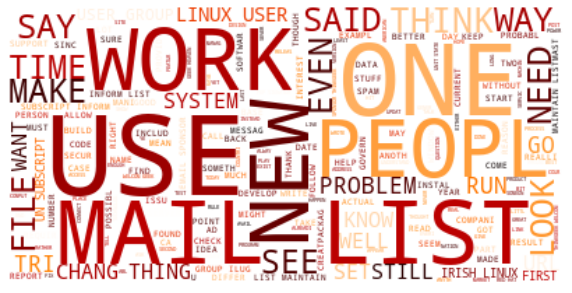

In [39]:
spam_str = ' '.join(flat_list_for_ham)

word_cloud = WordCloud(background_color='white',max_words=500, colormap='gist_heat')

word_cloud.generate(spam_str.upper())

plt.figure(figsize=[10, 7])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
clean_email_lengths = [len(sublist) for sublist in nested_list]
print('No. of words in the longest mails :', max(clean_email_lengths) )

No. of words in the longest mails : 7671


In [41]:
print('Email position in the list (and the data dataFrame)', np.argmax(nested_list))

Email position in the list (and the data dataFrame) 1284


In [42]:
nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [43]:
data.at[np.argmax(clean_email_lengths), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

In [44]:
type(nested_list)

pandas.core.series.Series

In [45]:
%%time

stemmed_word_list_df = pd.DataFrame.from_records(nested_list.tolist())
stemmed_word_list_df.head()


Wall time: 7.17 s


,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [46]:
print(stemmed_word_list_df.shape)

(5796, 7671)


In [47]:
stemmed_nested_list = data.MESSAGE.apply(clean_message_no_html_tags)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [48]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words', unique_words.shape[0])
unique_words.head()

Nr of unique words 27334


http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [49]:
VOCAB_SIZE = 2500

frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

Most common words: 
 http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64


In [50]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get


In [51]:
WORD_ID_FILE = 'Downloads/SpamData/01_Processing/word-by-id.csv'

vocab.to_csv(WORD_ID_FILE, 
             index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

word_index = pd.Index(vocab.VOCAB_WORD)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(stemmed_word_list_df, data.CATAGORY, test_size=0.4, random_state=42)

In [53]:
x_train.index.name = x_test.index.name = 'DOC_ID'
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
2321,politician,know,tell,truth,odd,impeach,next,monday,ob,ouch,...,None,None,None,None,None,None,None,None,None,None
4987,pgp,sign,messag,hash,de,friday,august,la,steve,price,...,None,None,None,None,None,None,None,None,None,None
2445,analog,program,jetta,monsoon,planet,npr,leav,local,broadcast,rang,...,None,None,None,None,None,None,None,None,None,None
24,copyright,right,reservedif,would,longer,like,contact,feel,havereceiv,email,...,None,None,None,None,None,None,None,None,None,None
1088,mortgag,lender,broker,readi,compet,busi,whether,new,home,loan,...,None,None,None,None,None,None,None,None,None,None


In [54]:
y_train.head() 

DOC_ID
2321    0
4987    0
2445    0
24      1
1088    1
Name: CATAGORY, dtype: int64

In [55]:
def sparse_matrix(df, indexed_words, labels):
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)
        
        

In [56]:
%%time


sparse_train_df = sparse_matrix(x_train, word_index, y_train)

Wall time: 8min 30s


In [57]:
sparse_train_df.head()

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,2321,1,45
1,0,2321,1,242
2,0,2321,1,1323
3,0,2321,1,1876
4,0,2321,1,186


In [58]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL' ]).sum().reset_index()
train_grouped.head()


,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1


In [59]:
train_grouped.shape


(223647, 4)

In [60]:
path_to_csv = 'Downloads/SpamData/01_Processing/data_t1.csv' 
train_grouped.to_csv(path_to_csv)

In [61]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [78]:
y_test.tail()

DOC_ID
5683    0
2235    0
647     1
1767    1
3842    0
Name: CATAGORY, dtype: int64

In [63]:
%%time

sparse_test_df = sparse_matrix(x_test, word_index, y_test)

Wall time: 6min 5s


In [64]:
sparse_test_df.shape

(258138, 4)

In [65]:
test_group = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()

In [66]:
TEST_DATA_FILE = 'Downloads/SpamData/01_Processing/word_text.txt'

np.savetxt(TEST_DATA_FILE, test_group, fmt='%d')

In [67]:
test_group.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [68]:
test_doc_ids = set(test_group.DOC_ID)

len(test_doc_ids)

2295

In [69]:
train_doc_ids = set(train_grouped.DOC_ID)

len(train_doc_ids)

3442

In [70]:
TRAIN_DATA_FILE = 'Downloads/SpamData/01_Processing/word_text_train.txt'

np.savetxt(TRAIN_DATA_FILE, train_grouped, fmt='%d')

In [71]:
TEST_DATA_FILE, TRAIN_DATA_FILE, WORD_ID_FILE

('Downloads/SpamData/01_Processing/word_text.txt',
 'Downloads/SpamData/01_Processing/word_text_train.txt',
 'Downloads/SpamData/01_Processing/word-by-id.csv')

In [72]:
sparse_train_data = np.loadtxt(TRAIN_DATA_FILE, delimiter=' ', dtype=int)

sparse_test_data = np.loadtxt(TEST_DATA_FILE, delimiter=' ', dtype=int)

In [73]:
sparse_train_data[-5:]

array([[5794, 1353,    0,    1],
       [5794, 1966,    0,    1],
       [5794, 2296,    0,    1],
       [5794, 2353,    0,    1],
       [5794, 2381,    0,    2]])

In [74]:
sparse_test_data[:5]

array([[8, 2, 1, 1],
       [8, 3, 1, 4],
       [8, 4, 1, 2],
       [8, 5, 1, 1],
       [8, 6, 1, 2]])

In [75]:
index_names = np.unique(sparse_train_data[:, 0])

def make_full_matrix(sparse_matrix, nr_words, doc_idx=0, word_idx=1, cat_idx=2,
                    freq_idx=3):
    
    column_names = ['DOC_ID'] + ['CATAGORY'] + list(range(0 , VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:0])
    full_matrix  = pd.DataFrame(index=index_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'DOC_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATAGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('DOC_ID', inplace=True)
    return full_matrix
        

In [151]:
%%time

full_train_data_set = make_full_matrix(sparse_train_data, nr_words=VOCAB_SIZE)

Wall time: 8.93 s


In [154]:
full_train_data_set.head()

,CATAGORY,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,2,1,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,1,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,0,0,2,4,0,3,14,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,1,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
full_train_data_set.CATAGORY.size

3442

In [122]:
full_train_data_set.CATAGORY.sum()

1055

In [123]:
prob_spam = full_train_data_set.CATAGORY.sum() / full_train_data_set.CATAGORY.size

print('Probability of spam is :', prob_spam)

Probability of spam is : 0.3065078442765834


In [124]:
full_train_features = full_train_data_set.loc[:, full_train_data_set.columns != 'CATAGORY']


In [125]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,2,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,2,4,0,3,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
email_lenghts = full_train_features.sum(axis=1)
email_lenghts.shape

(3442,)

In [127]:
email_lenghts[:5]

DOC_ID
0     87
1     53
2     40
3    183
4     43
dtype: int64

In [128]:
total_word_count = email_lenghts.sum()
total_word_count

374485

In [129]:
spam_lenghts = email_lenghts[full_train_data_set.CATAGORY == 1]
spam_lenghts.shape

(1055,)

In [130]:
spam_word_count = spam_lenghts.sum()
spam_word_count

152268

In [131]:
ham_length = email_lenghts[full_train_data_set.CATAGORY == 0]
ham_length.shape

(2387,)

In [132]:
ham_word_count = ham_length.sum()
ham_word_count

222217

In [133]:
spam_word_count + ham_word_count - total_word_count

0

In [134]:
print('Average no. of words in spam mails {:.0f}'.format(spam_word_count / 
                                                        spam_lenghts.shape[0]))

Average no. of words in spam mails 144


In [135]:
print('Average no. of words in ham mails {:.0f}'.format(ham_word_count / 
                                                       ham_length.shape[0]))

Average no. of words in ham mails 93


In [136]:
full_train_features.shape

(3442, 2500)

In [137]:
train_spam_token_subset = full_train_features.loc[full_train_data_set.CATAGORY == 1]
train_spam_token_subset.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,2,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,2,4,0,3,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
train_spam_token_subset.tail()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
1884,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1885,1,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1887,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1889,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1895,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
train_spam_token_subset.shape

(1055, 2500)

In [140]:
#### Laplace Smoothing

summed_spam_token = train_spam_token_subset.sum(axis=0) + 1 
summed_spam_token.shape

(2500,)

In [141]:
summed_spam_token.tail()

2495    28
2496     8
2497    10
2498     1
2499    10
dtype: int64

In [142]:
train_ham_token_subset = full_train_features.loc[full_train_data_set.CATAGORY == 0]
train_ham_token_subset.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
1896,1,2,1,0,1,1,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1898,2,1,0,1,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1899,2,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1900,3,4,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1901,2,2,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
#### Laplace Smoothing

summed_ham_token = train_ham_token_subset.sum(axis=0) + 1 
summed_ham_token.shape

(2500,)

In [144]:
summed_ham_token.tail()

2495     4
2496    25
2497    17
2498    25
2499    19
dtype: int64

# P(Token | Spam) - Probability that a token occurs given the email is spam

In [145]:
prob_token_spam = summed_spam_token / (spam_word_count + VOCAB_SIZE)
prob_token_spam[:5]

0    0.009169
1    0.005227
2    0.006713
3    0.011301
4    0.006584
dtype: float64

In [146]:
prob_token_spam.sum()

0.9999999999999999

In [147]:
prob_ham_token = summed_ham_token / (ham_word_count + VOCAB_SIZE)
prob_ham_token[:5]

0    0.021623
1    0.010311
2    0.007845
3    0.003653
4    0.006239
dtype: float64

In [148]:
prob_ham_token.sum()

1.0

# Sparse Matrix for test data

In [150]:
%%time

full_test_data_set = make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)

Wall time: 2min 23s


In [159]:
full_test_data_set.tail()

,CATAGORY,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
5786.0,0.0,5.0,5.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5788.0,0.0,NaN,4.0,NaN,2.0,4.0,3.0,3.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5792.0,0.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5793.0,0.0,1.0,9.0,1.0,NaN,NaN,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5795.0,0.0,3.0,4.0,2.0,NaN,5.0,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
x_test = full_test_data_set.loc[:, full_test_data_set.columns != 'CATAGORY']
y_test = full_test_data_set.CATAGORY